In [12]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.optim as optim
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np
print(torch.cuda.is_available())
use_cuda = True

True


In [ ]:
input_size = 28*28
hiddenLayer_size = [1000,500]
classes = 10
epochs = 10
batch_size = 100
lr = 1e-2

In [ ]:
train_dataset = dsets.MNIST(root='./data',train=True,transform=transforms.ToTensor(),download=True)
test_dataset = dsets.MNIST(root='./data',train=False,transform=transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,batch_size=batch_size,shuffle=False)

In [ ]:
class MLP(nn.Module):
  def __init__(self, input_size, hiddenLayer_size, output_size):
    super(MLP,self).__init__()
    self.net = nn.Sequential(
      nn.Linear(input_size, hiddenLayer_size[0]),
      nn.ReLU(),
      nn.Linear(hiddenLayer_size[0],hiddenLayer_size[1]),
      nn.ReLU(),
      nn.Linear(hiddenLayer_size[1],output_size)
    )
  def weights_init(self,initialisation):
    for module in self.modules():
      if isinstance(module, nn.Linear):
        if (initialisation == 1):
          nn.init.uniform_(module.weight,a=0.0,b=1.0)
        elif (initialisation == 2):
          nn.init.normal_(module.weight,mean = 0.0,std = 1.0)
        elif (initialisation == 3):
          nn.init.xavier_normal_(module.weight,gain = 1.0)

  def forward(self,x):
    out = self.net(x)
    return out

In [ ]:
def training(epochs, input_size, hiddenLayer_size, classes, train_loader, initialisation, lr):
  mlp = MLP(input_size, hiddenLayer_size, classes)
  mlp.weights_init(initialisation)
  if use_cuda and torch.cuda.is_available():
    mlp.cuda()
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.Adam(mlp.parameters(), lr)
  losses = []
  for epoch in range(epochs):
    running_loss = 0.0
    for i, (images, labels) in enumerate(train_loader):
      images = Variable(images.view(batch_size,28*28))
      labels = Variable(labels)
      if use_cuda and torch.cuda.is_available():
        images = images.cuda()
        labels = labels.cuda()

      optimizer.zero_grad()
      outputs = mlp(images)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()
      running_loss += loss.item()*images.size(0)
    epoch_loss = running_loss/len(train_dataset)
    print('Epoch [%d/%d], Loss = %.5f'%(epoch+1,epochs,epoch_loss))
    losses.append(epoch_loss)

  correct = 0
  total = 0
  for  images, labels in test_loader:
      images = Variable(images.view(batch_size,28*28))
    
      if use_cuda and torch.cuda.is_available():
          images = images.cuda()
          labels = labels.cuda()
    
    
      outputs = mlp(images)
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum()
  print('Accuracy : %.4f%%' %(100* correct / total))
  return losses
  


In [10]:
lr = [100,10,1,1e-1,1e-2,1e-3,1e-4,1e-5]
initialisation = ['uniform', 'normal','xavier_normal']
losses = np.zeros((len(lr),epochs))
i = 0
for learning_rate in lr:
  print("lr :" + str(learning_rate))
  losses[i,:] = training(epochs, input_size, hiddenLayer_size, classes, train_loader, 3, learning_rate)
  i+=1

losses1 = np.zeros((len(initialisation),epochs))
i = 0
for inits in initialisation:
  print("init type :" + str(inits))
  losses1[i,:] = training(epochs, input_size, hiddenLayer_size, classes, train_loader, i+1, 1e-2)
  i += 1

lr :100
Epoch [1/10], Loss = 4074446863.99919
Epoch [2/10], Loss = 15815.57798
Epoch [3/10], Loss = 55.19666
Epoch [4/10], Loss = 52.11145
Epoch [5/10], Loss = 54.61607
Epoch [6/10], Loss = 55.29576
Epoch [7/10], Loss = 51.59901
Epoch [8/10], Loss = 54.83786
Epoch [9/10], Loss = 51.65508
Epoch [10/10], Loss = 55.55262
Accuracy : 10.0000%
lr :10
Epoch [1/10], Loss = 3526456.99411
Epoch [2/10], Loss = 601.87565
Epoch [3/10], Loss = 2.82562
Epoch [4/10], Loss = 2.78973
Epoch [5/10], Loss = 2.97331
Epoch [7/10], Loss = 2.76965
Epoch [8/10], Loss = 2.80054
Epoch [9/10], Loss = 2.84825
Epoch [10/10], Loss = 2.87267
Accuracy : 9.0000%
lr :1
Epoch [1/10], Loss = 3957.51834
Epoch [2/10], Loss = 2.56202
Epoch [3/10], Loss = 2.49360
Epoch [4/10], Loss = 2.35157
Epoch [5/10], Loss = 2.35453
Epoch [6/10], Loss = 2.35546
Epoch [7/10], Loss = 2.35601
Epoch [8/10], Loss = 2.35618
Epoch [9/10], Loss = 2.35436
Epoch [10/10], Loss = 2.35723
Accuracy : 10.0000%
lr :0.1
Epoch [1/10], Loss = 6.69460
Epoch [

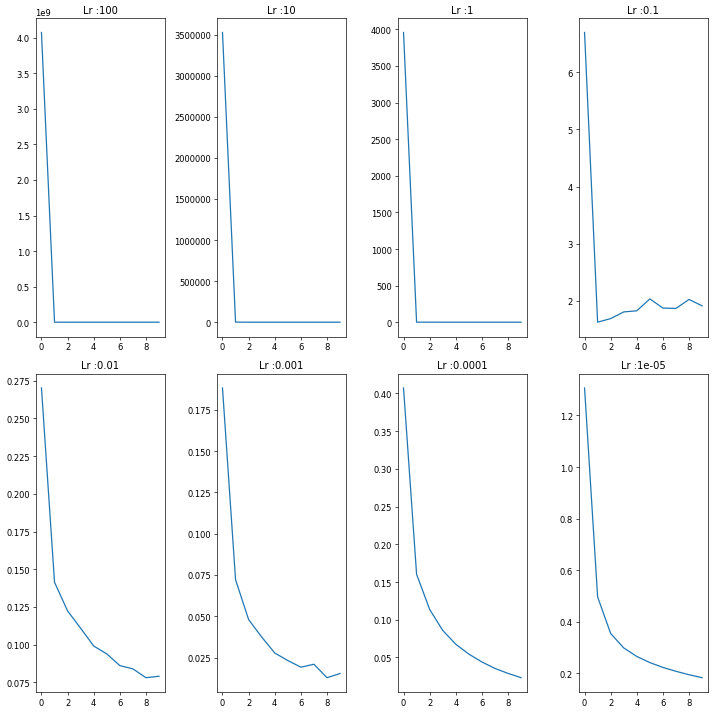

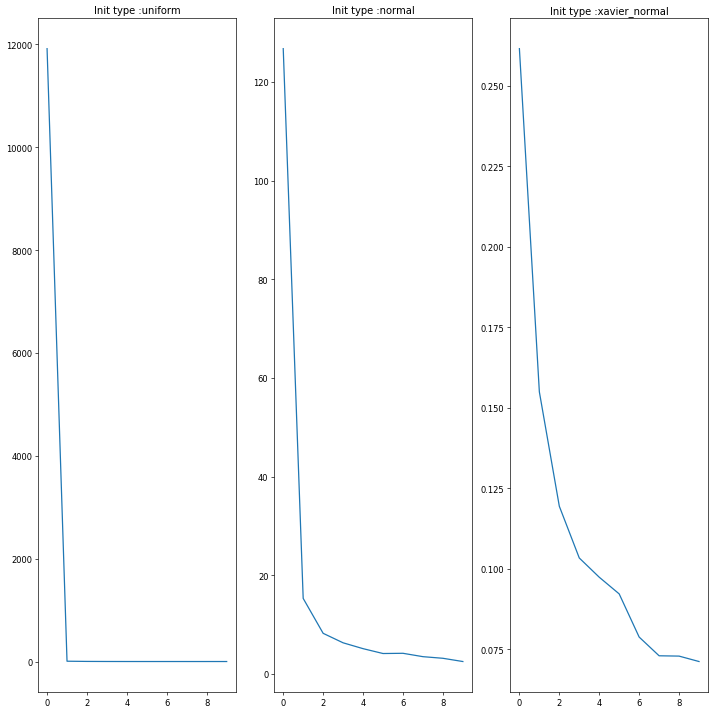

In [11]:
tmp = 241
fig = plt.figure(figsize = [12,12], dpi = 60)
for k in range(len(lr)):
  plt.subplot(tmp)
  plt.plot(losses[k,:])
  plt.title('Lr :' + str(lr[k]))
  tmp+=1
fig.tight_layout()
plt.show()
tmp = 131
fig1 = plt.figure(figsize = [12,12], dpi = 60)
for k in range(len(initialisation)):
  plt.subplot(tmp)
  plt.plot(losses1[k,:])
  plt.title('Init type :' + str(initialisation[k]))
  tmp+=1
fig1.tight_layout()
plt.show()